In [1]:
import warnings
warnings.filterwarnings('ignore')

import os

PROJ_ROOT = os.pardir

TRAIN_DATA = os.path.join(PROJ_ROOT, "data", "raw", "train.csv")
TEST_DATA = os.path.join(PROJ_ROOT, "data", "raw", "test.csv")

import sys
sys.path.append(os.path.join(PROJ_ROOT, "src"))

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from IPython.display import display


from fastai.imports import *
from fastai.torch_imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [3]:
PATH = os.path.join(PROJ_ROOT, "data", "raw/")

PATH


from sklearn.metrics import accuracy_score, r2_score

from sklearn.model_selection import train_test_split

In [4]:
!ls {PATH} 

bodyfat-test.csv             kaggle_solution_template.csv
bodyfat-train.csv


In [130]:
train_df = pd.read_csv(f"{PATH}/bodyfat-train.csv")
test_df = pd.read_csv(f"{PATH}/bodyfat-test.csv")

In [131]:
train_df.columns

Index(['Body fat (%)', 'Age (years)', 'Weight (lbs)', 'Height (inches)',
       'Neck (cm)', 'Chest (cm)', 'Abdomen (cm)', 'Hip (cm)', 'Thigh (cm)',
       'Knee (cm)', 'Ankle (cm)', 'Biceps (cm)', 'Forearm (cm)', 'Wrist (cm)'],
      dtype='object')

In [6]:
train_df.describe()

,Body fat (%),Age (years),Weight (lbs),Height (inches),Neck (cm),Chest (cm),Abdomen (cm),Hip (cm),Thigh (cm),Knee (cm),Ankle (cm),Biceps (cm),Forearm (cm),Wrist (cm)
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,18.977612,44.631841,178.370398,70.009950,37.992537,100.500000,92.392537,99.885572,59.407960,38.574627,23.060697,32.197015,28.645771,18.216418
std,8.391314,12.462896,30.489848,3.859877,2.549803,8.508314,10.973468,7.399307,5.503221,2.481875,1.647027,3.196043,2.080167,0.935189
min,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,22.000000,15.800000
25%,12.500000,35.000000,157.000000,68.250000,36.300000,94.000000,84.400000,95.500000,56.000000,36.900000,22.000000,30.000000,27.200000,17.600000
50%,19.200000,43.000000,176.000000,70.000000,38.000000,99.600000,90.900000,99.300000,58.900000,38.600000,22.800000,31.900000,28.700000,18.300000
75%,24.700000,54.000000,198.000000,72.250000,39.600000,105.300000,99.100000,103.700000,63.100000,39.900000,24.000000,34.600000,30.100000,18.800000
max,47.500000,81.000000,363.150000,77.500000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [128]:
target = train_df["Body fat (%)"]

In [140]:
ratio_list = [
    ("Height (inches)", "Weight (lbs)"),
    ("Chest (cm)", "Hip (cm)"),
    ("Age (years)", "Weight (lbs)"),
    ("Knee (cm)", "Thigh (cm)"),
    ("Chest (cm)", "Abdomen (cm)"),    
]

In [141]:
from sklearn.preprocessing import MinMaxScaler

In [142]:
scaler = MinMaxScaler()

In [143]:
scaler.fit_transform(train_df[columns_to_train])

/Users/manish/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[0.42373, 0.26875, 0.9375 , ..., 0.27228, 0.45736, 0.35714],
       [0.32203, 0.27182, 0.80729, ..., 0.42574, 0.55814, 0.48214],
       [0.67797, 0.29839, 0.89062, ..., 0.38614, 0.50388, 0.57143],
       ...,
       [0.84746, 0.29532, 0.85417, ..., 0.28218, 0.57364, 0.71429],
       [0.42373, 0.16861, 0.85938, ..., 0.20792, 0.32558, 0.32143],
       [0.32203, 0.14102, 0.82812, ..., 0.23762, 0.41085, 0.375  ]])

In [165]:
def feature_engineering(df, ratio_list):
    """Do not pass target in the df. It will be scaled."""
    ret = df.copy()
    for col1, col2 in ratio_list:
        create_ratio(ret, col1, col2)
#     scaler = MinMaxScaler()
#     return scaler.fit_transform(ret)
    return ret

In [166]:
train_processed = feature_engineering(train_df[columns_to_train], ratio_list)
test_processed = feature_engineering(test_df[columns_to_train], ratio_list)

In [106]:
columns_to_train = ["height_to_weight_ratio", "chest_to_hip_ratio", "age_to_weight_ratio",
                    "knee_to_thigh_ratio", "chest_to_abdomen_ratio", "Height (inches)", "Age (years)",
                    "Abdomen (cm)", "Neck (cm)", "Weight (lbs)"
                   ]

In [174]:
train_X, test_X, train_y, test_y = train_test_split(train_processed, target)

In [148]:
from sklearn.ensemble import RandomForestRegressor

In [149]:
model = RandomForestRegressor()

In [150]:
model.fit(train_X, train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [151]:
r2_score(model.predict(test_X), test_y)

0.22666082028956547

In [99]:
from sklearn.ensemble import GradientBoostingRegressor

In [100]:
model = GradientBoostingRegressor()

In [29]:
from sklearn.metrics import mean_absolute_error

In [152]:
mean_absolute_error(model.predict(test_X), test_y)

4.76313725490196

In [34]:
train_df.corr()["Body fat (%)"]

Body fat (%)              1.000000
Age (years)               0.281098
Weight (lbs)              0.604166
Height (inches)          -0.123521
Neck (cm)                 0.487892
Chest (cm)                0.712247
Abdomen (cm)              0.812182
Hip (cm)                  0.628160
Thigh (cm)                0.560525
Knee (cm)                 0.493188
Ankle (cm)                0.269730
Biceps (cm)               0.521717
Forearm (cm)              0.400249
Wrist (cm)                0.366006
height_to_weight_ratio   -0.699267
chest_to_hip_ratio        0.312930
age_to_weight_ratio      -0.073027
knee_to_thigh_ratio      -0.368292
chest_to_abdomen_ratio   -0.690165
Name: Body fat (%), dtype: float64

In [11]:
train_df["height_to_weight_ratio"] = train_df["Height (inches)"] / train_df["Weight (lbs)"]

In [12]:
train_df["chest_to_hip_ratio"] = train_df["Chest (cm)"] / train_df["Hip (cm)"]

In [13]:
train_df["age_to_weight_ratio"] = train_df["Age (years)"] / train_df["Weight (lbs)"]

In [14]:
train_df["knee_to_thigh_ratio"] = train_df["Knee (cm)"] / train_df["Thigh (cm)"]

In [15]:
train_df["chest_to_abdomen_ratio"] = train_df["Chest (cm)"] / train_df["Abdomen (cm)"]

In [10]:
columns_to_train = ["height_to_weight_ratio", "chest_to_hip_ratio", "age_to_weight_ratio",
                    "knee_to_thigh_ratio", "chest_to_abdomen_ratio", "Height (inches)", "Age (years)",
                    "Abdomen (cm)", "Neck (cm)"
                   ]

In [69]:
col_names = []
def create_ratio(df, col1, col2):
    col_name = f"{col1}_{col2}_ratio"
    df[col_name] = df[col1]/df[col2]
    return col_name
ratio_list = [
    ("Height (inches)", "Weight (lbs)"),
    ("Chest (cm)", "Hip (cm)"),
    ("Age (years)", "Weight (lbs)"),
    ("Knee (cm)", "Thigh (cm)"),
    ("Chest (cm)", "Abdomen (cm)"),    
]
for col1, col2 in ratio_list:
    col_names.append(create_ratio(test_df, col1, col2))
col_names

['Height (inches)_Weight (lbs)_ratio',
 'Chest (cm)_Hip (cm)_ratio',
 'Age (years)_Weight (lbs)_ratio',
 'Knee (cm)_Thigh (cm)_ratio',
 'Chest (cm)_Abdomen (cm)_ratio']

In [71]:
test_cols = ['Height (inches)_Weight (lbs)_ratio',
 'Chest (cm)_Hip (cm)_ratio',
 'Age (years)_Weight (lbs)_ratio',
 'Knee (cm)_Thigh (cm)_ratio',
 'Chest (cm)_Abdomen (cm)_ratio', 
             "Height (inches)", "Age (years)",
                    "Abdomen (cm)", "Neck (cm)", "Weight (lbs)"
            ]

In [73]:
len(test_cols), len(columns_to_train)

(9, 9)

In [38]:
from lightgbm.sklearn import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import ExtraTreesRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [109]:
models = [RandomForestRegressor, GradientBoostingRegressor, LGBMRegressor, XGBRegressor, ExtraTreesRegressor, AdaBoostRegressor,
          BaggingRegressor, SVR, LinearRegression, Ridge, Lasso]

In [110]:
train_df.columns

Index(['Body fat (%)', 'Age (years)', 'Weight (lbs)', 'Height (inches)',
       'Neck (cm)', 'Chest (cm)', 'Abdomen (cm)', 'Hip (cm)', 'Thigh (cm)',
       'Knee (cm)', 'Ankle (cm)', 'Biceps (cm)', 'Forearm (cm)', 'Wrist (cm)',
       'height_to_weight_ratio', 'chest_to_hip_ratio', 'age_to_weight_ratio',
       'knee_to_thigh_ratio', 'chest_to_abdomen_ratio',
       'Height (inches)_Weight (lbs)_ratio'],
      dtype='object')

In [117]:
columns_to_train = [ "Height (inches)", "Age (years)",
                    "Abdomen (cm)", "Neck (cm)", "Weight (lbs)", 'Chest (cm)',
                    'chest_to_abdomen_ratio', 'chest_to_hip_ratio', 'height_to_weight_ratio'
                    
                   ]

In [132]:
columns_to_train = ['Age (years)', 'Weight (lbs)', 'Height (inches)',
       'Neck (cm)', 'Chest (cm)', 'Abdomen (cm)', 'Hip (cm)', 'Thigh (cm)',
       'Knee (cm)', 'Ankle (cm)', 'Biceps (cm)', 'Forearm (cm)', 'Wrist (cm)',
       'height_to_weight_ratio', 'chest_to_hip_ratio', 'age_to_weight_ratio',
       'knee_to_thigh_ratio', 'chest_to_abdomen_ratio',
       'Height (inches)_Weight (lbs)_ratio']

In [136]:
columns_to_train = ['Age (years)', 'Weight (lbs)', 'Height (inches)',
       'Neck (cm)', 'Chest (cm)', 'Abdomen (cm)', 'Hip (cm)', 'Thigh (cm)',
       'Knee (cm)', 'Ankle (cm)', 'Biceps (cm)', 'Forearm (cm)', 'Wrist (cm)']

In [137]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error

In [240]:
train_X, test_X, train_y, test_y = train_test_split(train_processed, target, random_state=42, test_size=0.2)
d = {}
for model in models:
    print(f"Training {str(model).split('.')[-1][:-2]}")
    d[model] = model()
    d[model].fit(train_X, train_y)
    pred = d[model].predict(test_X)
    r2 = r2_score(pred, test_y)
    mas = mean_absolute_error(pred, test_y)
    msle=0
#     msle = mean_squared_log_error(pred, test_y)
    print(f"r2: {r2}, msle: {msle}, mas: {mas}, {str(model).split('.')[-1][:-2]}")
    d[model] = [d[model], r2, mas]
    

Training RandomForestRegressor
r2: 0.33241287697940347, msle: 0, mas: 4.459512195121951, RandomForestRegressor
Training GradientBoostingRegressor
r2: 0.2763960782212731, msle: 0, mas: 4.577256312483618, GradientBoostingRegressor
Training LGBMRegressor
r2: 0.29812072681554636, msle: 0, mas: 4.345799266490323, LGBMRegressor
Training XGBRegressor
r2: 0.26489513716879864, msle: 0, mas: 4.6001686445096635, XGBRegressor
Training ExtraTreesRegressor
r2: 0.1277882647169668, msle: 0, mas: 4.672926829268293, ExtraTreesRegressor
Training AdaBoostRegressor
r2: 0.3240344058581708, msle: 0, mas: 4.132155420844098, AdaBoostRegressor
Training BaggingRegressor
r2: 0.03950678251745887, msle: 0, mas: 4.727073170731706, BaggingRegressor
Training SVR
r2: -29.703273929085725, msle: 0, mas: 6.425258991322019, SVR
Training LinearRegression
r2: 0.5713024740606394, msle: 0, mas: 4.507937920995569, LinearRegression
Training Ridge
r2: 0.5242041761102776, msle: 0, mas: 3.7657659503474097, Ridge
Training Lasso
r2: 

In [77]:
lass = d[Lasso][0]

In [79]:
pred = lass.predict(test_df[test_cols])

In [80]:
pred

array([18.71114, 13.37079, 17.97995, 22.56774, 17.02852, 26.52329, 17.53004, 20.15055, 16.71987, 11.72605,
       28.56292, 21.36022, 39.26842, 14.46475, 23.87703, 22.98661, 14.04654, 17.73614, 15.9213 , 17.12507,
       31.87368, 22.57652, 19.07651, 23.22365, 15.77502, 14.10424, 14.76172, 15.76243,  7.159  , 10.40154,
       33.26389, 27.0539 , 19.05605, 11.10059, 30.74813,  8.95322, 14.9821 , 21.48714, 25.82672, 28.14255,
       19.46064, 28.81924, 16.50755, 15.14007, 16.77633, 16.42947,  8.30124, 19.66233, 33.8028 , 20.18578,
       22.59525])

In [81]:
subm_df = pd.read_csv("../data/raw/kaggle_solution_template.csv")

In [83]:
subm_df.head()

,Id,Body fat(%)
0,0,NaN
1,1,NaN
2,2,NaN
3,3,NaN
4,4,NaN


In [84]:
subm_df["Body fat(%)"] = pred

In [86]:
subm_df.head()

,Id,Body fat(%)
0,0,18.711142
1,1,13.370788
2,2,17.979951
3,3,22.567740
4,4,17.028521


In [88]:
subm_df.to_csv("../data/raw/submission.csv", index=None)

In [182]:
model = RandomForestRegressor(n_estimators=100, max_depth=4, max_features=0.5)

In [183]:
model.fit(train_X, train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features=0.5, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [184]:
mean_absolute_error(model.predict(test_X), test_y)

3.934616612132436

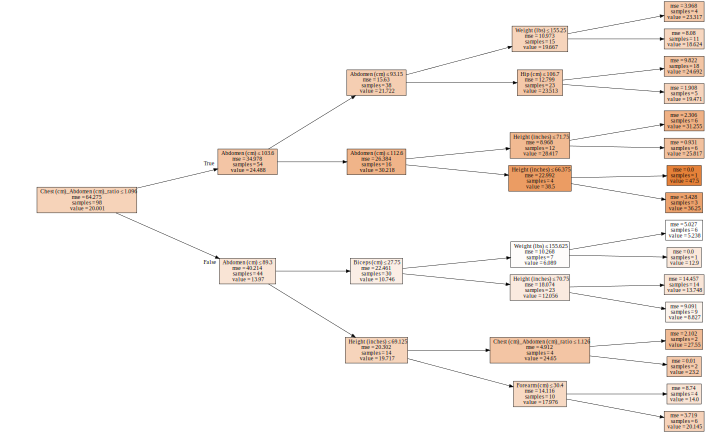

In [185]:
draw_tree(model.estimators_[2], train_X, precision=3)

In [179]:
train_X.head()

,Age (years),Weight (lbs),Height (inches),Neck (cm),Chest (cm),Abdomen (cm),Hip (cm),Thigh (cm),Knee (cm),Ankle (cm),Biceps (cm),Forearm (cm),Wrist (cm),Height (inches)_Weight (lbs)_ratio,Chest (cm)_Hip (cm)_ratio,Age (years)_Weight (lbs)_ratio,Knee (cm)_Thigh (cm)_ratio,Chest (cm)_Abdomen (cm)_ratio
44,35,228.25,69.50,40.4,114.9,115.9,111.9,74.4,40.6,24.0,36.1,31.8,18.8,0.304491,1.026810,0.153341,0.545699,0.991372
52,35,217.00,73.75,40.5,107.5,95.1,104.5,64.8,41.3,25.6,36.4,33.7,19.4,0.339862,1.028708,0.161290,0.637346,1.130389
49,55,198.50,74.25,38.3,105.3,96.7,106.6,64.0,42.6,23.4,33.2,30.0,18.4,0.374055,0.987805,0.277078,0.665625,1.088935
133,40,168.50,69.25,34.2,97.8,92.3,100.6,57.5,36.8,22.8,32.1,26.0,17.3,0.410979,0.972167,0.237389,0.640000,1.059588
59,50,203.00,67.00,40.2,114.8,108.1,102.5,61.3,41.1,24.7,34.1,31.0,18.3,0.330049,1.120000,0.246305,0.670473,1.061980


In [186]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

In [233]:
fi = rf_feat_importance(model, train_X); fi[:20]

,cols,imp
38,Height (inches)_Abdomen (cm)_ratio,0.275753
69,Abdomen (cm)_Wrist (cm)_ratio,0.171255
5,Abdomen (cm),0.128781
63,Abdomen (cm)_Hip (cm)_ratio,0.066501
47,Neck (cm)_Abdomen (cm)_ratio,0.038787
66,Abdomen (cm)_Ankle (cm)_ratio,0.034764
65,Abdomen (cm)_Knee (cm)_ratio,0.021117
37,Height (inches)_Chest (cm)_ratio,0.016313
55,Chest (cm)_Abdomen (cm)_ratio,0.015186
68,Abdomen (cm)_Forearm (cm)_ratio,0.013150


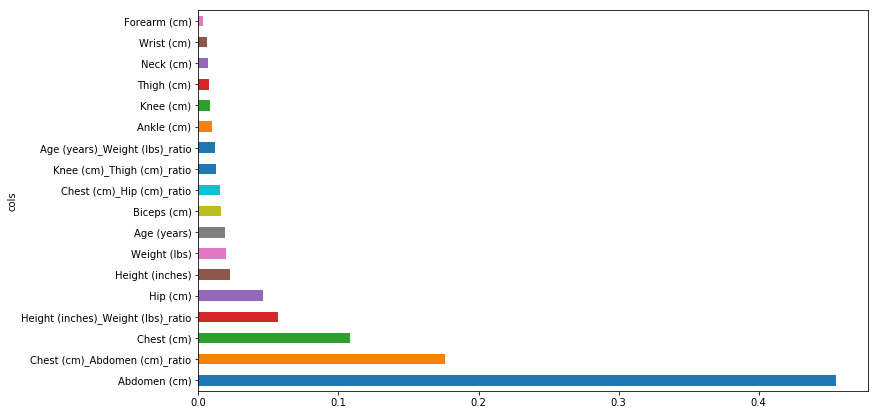

In [189]:
plot_fi(fi)

In [206]:
to_keep = fi[fi.imp>0.02].cols; len(to_keep)

9

In [229]:
train_X, test_X, train_y, test_y = train_test_split(train_processed, target)

In [230]:
model = RandomForestRegressor(max_features=0.5, n_estimators=100)

In [231]:
model.fit(train_X, train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.5, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [232]:
mean_absolute_error(model.predict(test_X), test_y)

3.691098039215687

In [218]:
def feature_engineering(df):
    """Do not pass target in the df. It will be scaled."""
    columns = list(df.columns)
    ratio_list = combinations(columns, 2)
    ret = df.copy()
    for col1, col2 in ratio_list:
        create_ratio(ret, col1, col2)
#     scaler = MinMaxScaler()
#     return scaler.fit_transform(ret)
    return ret

In [228]:
train_processed = feature_engineering(train_df.drop(['Body fat (%)'], axis=1))

In [214]:
l

['Body fat (%)',
 'Age (years)',
 'Weight (lbs)',
 'Height (inches)',
 'Neck (cm)',
 'Chest (cm)',
 'Abdomen (cm)',
 'Hip (cm)',
 'Thigh (cm)',
 'Knee (cm)',
 'Ankle (cm)',
 'Biceps (cm)',
 'Forearm (cm)',
 'Wrist (cm)']

In [215]:
from itertools import combinations

In [217]:
list(combinations(l, 2))

[('Body fat (%)', 'Age (years)'),
 ('Body fat (%)', 'Weight (lbs)'),
 ('Body fat (%)', 'Height (inches)'),
 ('Body fat (%)', 'Neck (cm)'),
 ('Body fat (%)', 'Chest (cm)'),
 ('Body fat (%)', 'Abdomen (cm)'),
 ('Body fat (%)', 'Hip (cm)'),
 ('Body fat (%)', 'Thigh (cm)'),
 ('Body fat (%)', 'Knee (cm)'),
 ('Body fat (%)', 'Ankle (cm)'),
 ('Body fat (%)', 'Biceps (cm)'),
 ('Body fat (%)', 'Forearm (cm)'),
 ('Body fat (%)', 'Wrist (cm)'),
 ('Age (years)', 'Weight (lbs)'),
 ('Age (years)', 'Height (inches)'),
 ('Age (years)', 'Neck (cm)'),
 ('Age (years)', 'Chest (cm)'),
 ('Age (years)', 'Abdomen (cm)'),
 ('Age (years)', 'Hip (cm)'),
 ('Age (years)', 'Thigh (cm)'),
 ('Age (years)', 'Knee (cm)'),
 ('Age (years)', 'Ankle (cm)'),
 ('Age (years)', 'Biceps (cm)'),
 ('Age (years)', 'Forearm (cm)'),
 ('Age (years)', 'Wrist (cm)'),
 ('Weight (lbs)', 'Height (inches)'),
 ('Weight (lbs)', 'Neck (cm)'),
 ('Weight (lbs)', 'Chest (cm)'),
 ('Weight (lbs)', 'Abdomen (cm)'),
 ('Weight (lbs)', 'Hip (cm)'),
 

## Neural Network